In [1]:
import pandas as pd

dfclientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dflojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfpag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')
dfprodutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfvendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')

# Análise Preliminar

In [2]:
dfclientes.head(5) # Comando para ver como esta a tabela, Head(5) mostra os 5 primeiros registro da tabela. posso utlizar HEAD, SAMPLE(registro aleatorio) OU TAIL(ultimos registros)

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [3]:
dfclientes.isnull().sum() # Comando para verificar quantos dados no tabela sao nulos(isnull()) e somar(sum()) a quantidade de dados nulos.

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [4]:
dfclientes[dfclientes.isnull().T.any()] # usando o DataFrame(df) com o filtro[dfclientes.isnull().T.any()] para filtrar os dados nulos e mostrar na tela quais sao, O T faz a transposição dos dados, mostrando os dados nao somente se é verdadeiro ou falso, para que sejam monstrados como abaixo. ANY me traz as informações verdadeiras.

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [5]:
dfclientes.sexo.unique() # verificar na coluna SEXO , quais os dados que existem, nesse caso temos 3 dados, o F, M e NAN(nulos)

array(['F', 'M', nan], dtype=object)

In [6]:
dfprodutos # lendo o dataframe produtoos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<AxesSubplot: >

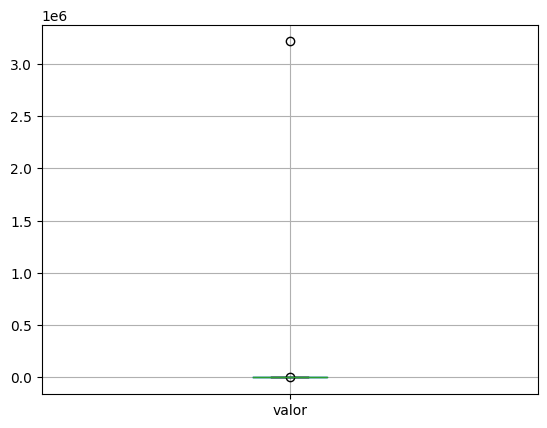

In [7]:
dfprodutos.boxplot(column=['valor'])

In [8]:
dfvendas[dfvendas.id_produto==10].count() # verificando na dataframe vendas se o produto 10 com valor muito alto ja foi vendido alguma ve. utilizando o COUNT() para saber quantas vendas foram feitas.
#Nesse caso foi identificado que o produto com valor estranho (muito alto) foi vendido muitas vezes e nao parece ser um valor invalido, nesse caso sempre verificar com a area responsavel se o valor esta correto.

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [9]:
dfvendas.isnull().sum()
# Verificando se na tabela (dataframe) vendas tem algum dado nulo.

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [10]:
dfvendas.describe()
# Verificar dados da dataframe vendas

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [11]:
dfpag.describe()
#verificando os pagamento, verifico nessa analise que o maximo de pagamentos foi 2997 pagamentos, sendo que na tabela vendas temos 3000 vendas, com isso nao há pagamentos a mais que as vendas

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleaning

## Dados nulos

In [12]:
dfvendas[dfvendas.id_cliente == 264] 
# Verficando se existem vendas para clientes com dados nulos

,id,id_cliente,id_loja,id_produto,dt_venda
229,230,264,2,3,2018-03-28
562,563,264,5,3,2018-07-07
1438,1439,264,3,3,2019-04-29
2021,2022,264,6,3,2019-11-08
2877,2878,264,10,3,2020-08-14


In [13]:
dfclientes.loc[1,'nome']
# Acessando a tabela clientes e usando LOC para localizar a linha 1 e a coluna NOME.

'Caio Pereira'

In [14]:
dfclientes.loc[dfclientes.nome.isnull(),'nome'] = 'Sem Nome'
dfclientes.loc[dfclientes.sexo.isnull(),'sexo'] = 'O'
dfclientes.loc[dfclientes.dt_nasc.isnull(),'dt_nasc'] = 1/1/2020
# Aqui eu estou localizando os dados nulos de cada coluna e atribuindo a eles um valor que seja possivell identificar

In [15]:
dfclientes.isnull().sum()
# Verificando se todos os dados nulos sumiram

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [16]:
dfprodutos.isnull().sum()
# Verificando se a aba produtos tem dados nulos

id         0
produto    0
valor      0
dtype: int64

In [17]:
dfvendas.isnull().sum()
# Verificando aba vendas

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [18]:
dfpag.isnull().sum()
# Verificando aba pagamentos(pag)

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [19]:
dflojas.isnull().sum()
# Verificando aba lojas

id        0
cidade    0
dtype: int64

In [20]:
# Dessa forma eliminamos os dados nulos, deixando nosso arquivo pronto para o proximo passo.

## Outliers

### Busca por outliers só acontece sobre dados numericos ou floats, não é necessario usar em numeros inteiros. nunca usado para caracteres 

dfprodutos.loc[9,'valor'] = dfprodutos.valor[9]/10000
# localizar na aba produtos a linha 9 da coluna valor e atribuir a ela o valor dela dividido por 10000
dfprodutos

<AxesSubplot: >

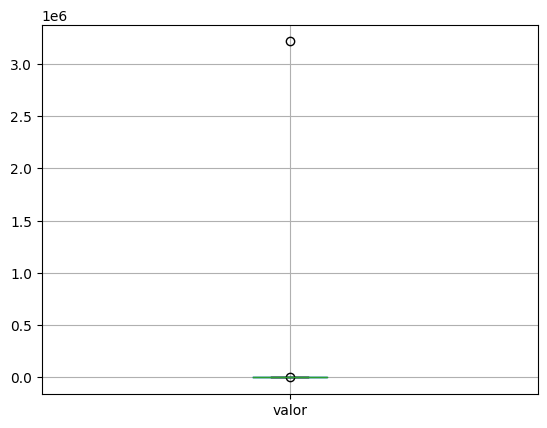

In [61]:
dfprodutos.boxplot(column=['valor'])


## Consistência

In [22]:
## Usar comando ISIN para localizar dados inconsistentes, no caso abaixo identifico que nao existem vendas sem clientes cadastrados. pois o codigo abaixo retorna verdadeiro quando solicito quee verifique se existe todos os meus ID de clinetes da aba vendas na aba clinetes.

In [23]:
dfvendas.id_cliente.isin(dfclientes.id).any()

True

In [24]:
dfvendas[~dfvendas.id.isin(dfpag.id_venda)].count()
# verificando quantos ID na aba vendas não constam na aba PAG e calculando quantos são

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados duplicados

In [25]:
dfclientes.nome.duplicated().sum()
# verificando quantos nomes duplicados tenho na aba clientes.

109

In [26]:
dfclientes[dfclientes.nome.duplicated()]
# filtrando os duplicados para que apareçam na tela

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [27]:
dfclientes[dfclientes.nome=='Anna Melo']
# como verificado no codigo anteior foi identificado que a Anna Melo estava em duplicado, entao foi usado filtro para identificar se a Anna Melo duplicada é realmente a mesma pessoa.

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [28]:
dfprodutos.produto.duplicated().sum()
# verificando se na aba produtos existe dados duplicados.

0

In [29]:
dflojas.cidade.duplicated().sum()

0

## Formato de dados (Data)

In [30]:
dfclientes.dt_nasc = pd.to_datetime(dfclientes.dt_nasc)
dfclientes

# alterando o formato da data de nascimento para p formato padrao do python(pandas) YYYY-MM-DD e depois visualizando se foi alterado

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Indexes

In [31]:
dfclientes = dfclientes.set_index('id')
dfclientes

# Atribuindo que a coluna "ID" a partir de agora será minha chave primária, 
# fazendo isso a coluna criada pelo proprio pandas para identificar as linhas some e somente ficara minha 
# coluna ID como minha chave. conforme abaixo.

#a partir de agora nao se acessa a coluna ID chamando a coluna de ID, daqui pra frente a coluna ID sera localizada com o 
# comando INDEX.

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


dfclientes.index
# acessando a coluna ID depos de configurada para chave primaria(INDEX)

In [32]:
dflojas = dflojas.set_index('id')
dfprodutos = dfprodutos.set_index('id')
dfvendas = dfvendas.set_index('id')
dfpag = dfpag.set_index('id')

# esse codigo pega a coluna ID de todas as abas e a transforma na chave primária(INDEX)

In [33]:
dflojas

,cidade
id,
1,São Paulo
2,Rio de Janeiro
3,Curitiba
4,Belo Horizonte
5,Santa Catarina
6,Recife
7,Salvador
8,Brasília
9,Palmas


In [34]:
dfprodutos

,produto,valor
id,,
1,mouse,20.0
2,teclado,30.0
3,laptop básico,2300.0
4,laptop gamer,5300.0
5,monitor,1500.0
6,impressora,700.0
7,carregador,150.0
8,cadeira,540.0
9,mesa,860.0


In [35]:
dfvendas

,id_cliente,id_loja,id_produto,dt_venda
id,,,,
1,393,9,3,2018-01-04
2,417,9,3,2018-01-04
3,374,7,8,2018-01-04
4,59,4,3,2018-01-05
5,18,9,1,2018-01-05
...,...,...,...,...
2996,671,3,7,2020-09-27
2997,586,8,3,2020-09-27
2998,731,2,4,2020-09-27


In [36]:
dfpag

,id_venda,dt_pgto
id,,
1,1,2018-01-24
2,2,2018-02-17
3,3,2018-02-14
4,5,2018-01-23
5,7,2018-02-15
...,...,...
2068,2990,2020-10-04
2069,2992,2020-10-10
2070,2994,2020-10-09


# Data Fusion (join)

In [37]:
df = dfvendas.join(dfclientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dflojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfprodutos.add_prefix('produto_'), on='id_produto')
# Nesse código foi juntado a aba vendas com a aba clientes em uma nova variavel/dataframe, 
# adicionando o prefixo/titulo adcional CLIENTE_ na tabela clientes
# usando como parametro a coluna ID_Clientes que conecta com meu INDEX da aba clientes.
# conforme abaixo, agora a tabela vendas possui a informação 

# nas linhas seguintes foi utilizado o join para juntar as abas lojas e produtos a variavel/dataframe DF

In [38]:
df.head(5)
# vizualizando as primeira 5 linhas da variavel/dataframe nova para conferir se esta tudo ok.

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0


In [39]:
# Na aba vendas não existe nenhuma identificacao que possa ser usado para vincular a aba pagamentos,
# mas na aba pagamentos existe a coluna id_venda que seria o indez da tabela vendas, 
# tornando assim mais facil fazer o join. codigo abaixo usamos o id_venda da aba pagamentos para dar join
# na variavel/dataframe DF

df = df.join(dfpag.set_index('id_venda'))

In [40]:
df.head(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23


## Verificar dados nulos no novo Dataframe DF

In [41]:
df.isnull().sum()
# Verificando se existe dados nulos no dataframe DF, com isso foi identificado que somente a coluan DT_PGTO possui valores nulos
# Esses dados nulos foi identificado pois temos vendas sem pagamentos.

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering (criando novos dados/variaveis para analise de dados)

In [42]:
#Criar nova coluna PG para identificar se houve ou nao pagamento.
df['pg'] = 1 # adicionando coluna PG com valor 1 em toda minha tabela
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
# determinando que se a coluna DT_PGTO for nulo, então a coluna PG recebe 0
df


,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [43]:
# Criar data tempo de pagamento, tempo media entre venda e pagamento
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
# coluna nova recebe data de pagamento menos data de vendas e coloco os dados em numeros inteiros com o comando .DT.DAYS
df.head(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0


In [44]:
# Criar coluna com a idade dos meus clientes

import numpy as np
# np.floor serve como comando de arredondamento, tornando assim a idade em numeto inteiro
# pd.datetime('today') é o comando para identificar o dia de hoje -(menos) df.cliente_dt_nasc.
# para que o código calcule anos e nao dias usa-se o comando np.timedelta64(1, 'Y')
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1, 'Y'))
df.head(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,72.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,50.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0


# Análises

## Lojas e produtos que mais vendem

In [45]:
df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
# agrupando todos os dados pela cidade da loja para que meu dataframe crie um subdataframe para cada cidade.
# COUNT() para calcular o total para cada cidade.
# PRODUTO_VALOR para filtrar somente a coluna produto valor para calcular o total de vendas na cidade.
# comando sort_values(ascending=False) para deixar minha subdataframe em ordem descendente, do maior para o menor.

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

In [46]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
# criando uma variavel para salvar a tabela de lojas que realizaram a maior quantidade de vendas.
# depois visualizar e em seguida criar um grafico com essa informação
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por loja')

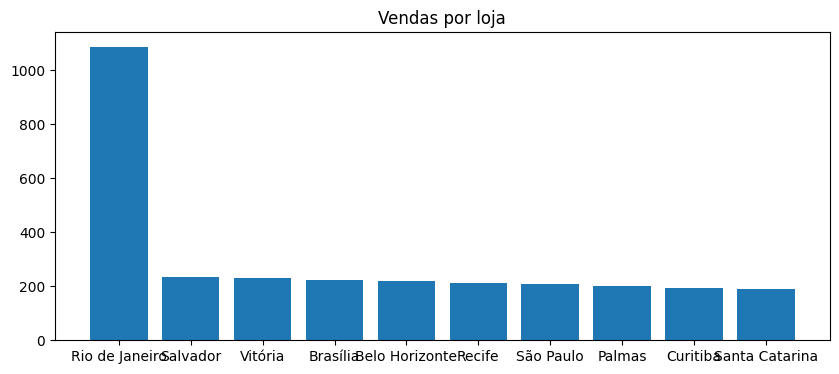

In [63]:
import matplotlib.pyplot as plt 
%matplotlib inline
# importando a biblioteca de graficos e colocando o comando %matplotlib inline para que o grafico seja visualizado
plt.figure(figsize=(10,4))
# Determinando o tamanho do meu grafico
plt.bar(graf_dados.index, graf_dados.values)
# criando o grafico de barras (BAR), dentro do grafico escolhe-se ver os dados de INDEX que seria o nome da cidade
# na posicao X e os valores na posicao Y do grafico.
plt.title('Vendas por loja')
# Adicionando um titulo ao meu grafico.

## Produtos que mais vendem

In [64]:
df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
# agrupando todos os dados pelo produto para que meu dataframe crie um subdataframe para cada produto.
# COUNT() para calcular o total para cada produto.
# PRODUTO_VALOR para filtrar somente a coluna produto valor para calcular o total de vendas do produto.
# comando sort_values(ascending=False) para deixar minha subdataframe em ordem descendente, do maior para o menor.

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

In [66]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
# criando uma variavel para salvar a tabela de produtos que realizaram a maior quantidade de vendas.
# depois visualizar e em seguida criar um grafico com essa informação
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por produto')

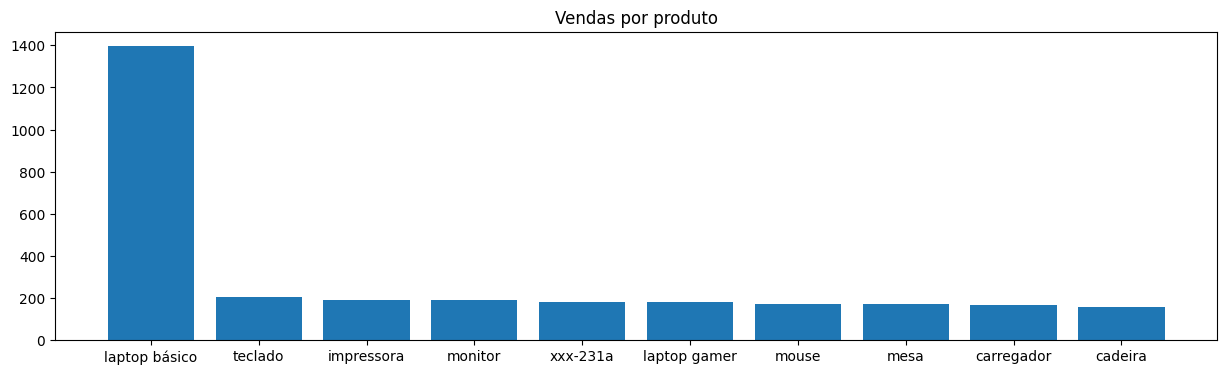

In [68]:
plt.figure(figsize=(15,4))
# Determinando o tamanho do meu grafico
plt.bar(graf_dados.index, graf_dados.values)
# criando o grafico de barras (BAR), dentro do grafico escolhe-se ver os dados de INDEX que seria o nome da cidade
# na posicao X e os valores na posicao Y do grafico.
plt.title('Vendas por produto')
# Adicionando um titulo ao meu grafico.